In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**II.Nguồn và dữ liệu thu thập:**

In [ ]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   ManufactureName   205 non-null    object 
 3   CarName           205 non-null    object 
 4   fueltype          203 non-null    object 
 5   aspiration        199 non-null    object 
 6   doornumber        200 non-null    object 
 7   carbody           202 non-null    object 
 8   drivewheel        204 non-null    object 
 9   enginelocation    202 non-null    object 
 10  wheelbase         205 non-null    float64
 11  carlength         205 non-null    float64
 12  carwidth          205 non-null    float64
 13  carheight         205 non-null    float64
 14  curbweight        205 non-null    int64  
 15  enginetype        205 non-null    object 
 16  cylindernumber    205 non-null    object 
 1

In [ ]:
df.head(5)

,car_ID,symboling,ManufactureName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,3,alfa,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,1,alfa,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,-154.0,5000.0,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Trong file csv có tổng cộng 27 cột.
Do quá nhiều cột nên làm tràn ra màn hình => setup lại số cột và số dòng tối đa để có thể hiển thị hết 27 cột.

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
print('Dataframe Shape: ',df.shape)
df.head(5)

Dataframe Shape:  (205, 27)


,car_ID,symboling,ManufactureName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,3,alfa,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,1,alfa,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,-154.0,5000.0,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Mô tả dữ liệu:

| Tên     | Mô tả |
| ----------- | ----------- |
| Car_ID      | ID của xe |
| Symboling    | Xếp hạng rủi ro bảo hiểm được chỉ định của nó, Giá trị +3 chỉ ra rằng ô tô kém an toàn nhất, -2 chỉ ô tô an toàn nhất      |
|ManufacturerName| Tên hãng sản xuất|
| carName   | Tên xe       |
| fueltype   |  Loại nhiên liệu (gas hay dầu diesel)      |
| aspiration   | Động cơ hút khí tự nhiên(std) hay động cơ tăng áp(turbo)     |
| doornumber   | Số cửa của xe   |
| carbody | Kiểu thân xe ('sedan': mui kín,4 chỗ ,'convertible':mui trần ,'hatchback': xe nhỏ,đuôi xe ngắn ,'wagon':  ,'hardtop' ,'')
| drivewheel | Loại bánh xe truyền động
| enginelocation | Vị trí của động cơ ô tô 
| wheelbase | Chiều dài cơ sở
| carlength | Chiều dài xe 
| carwidth |Chiều rộng xe 
| carheight | Chiều cao xe
| curbweight |Trọng lượng của một chiếc xe không có người ngồi trong xe hoặc hành lý
| enginetype | Loại động cơ
| cylindernumber | Xi lanh được đặt trong xe
| enginesize | Kích thước động cơ
| fuelsystem | Hệ thống nhiên liệu 
| boreratio |  Xi lanh của xe
| stroke | Pistong
| compressionratio | Tỷ số nén của ô tô
| horsepower | Mã lực
| peakrpm | Vòng tua
| citympg | Số dặm đi trong thành phố
| highwaympg | Số dặm đi trong cao tốc
| price | Giá xe


*Note: 

1.   Cột nào quan trọng (giữ lại) 

2.   Cột nào không quan trọng (xóa đi)
 doornumber , Car_ID  , carbody , drivewheel,enginelocation ,wheelbase
carlength ,carwidth,carheight , curbweight ,enginetype ,cylindernumber,enginesize,fuelsystem, boreratio ,stroke ,compressionratio ,peakrpm,citympg,highwaympg

.....

In [ ]:
# Số hàng và số cột trong df
df.shape

(205, 27)

In [ ]:
# Mô tả những cột dữ liệu dạng số: 
# count: đếm số lượng dòng khác null 
# mean : giá trị trung bình
# std : đo độ lệch chuẩn (độ lệch chuẩn nhỏ => độ dao động dữ liệu trong cột đó thấp và ngược lại)
# min : giá trị nhỏ nhất trong cột
# max : giá trị lớn nhất trong cột

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,182.0,3.329890,0.267677,2.68,3.15,3.31,3.58,3.94
stroke,199.0,3.256432,0.317115,2.07,3.11,3.29,3.41,4.17


In [ ]:
# Kiểm tra xem có bao nhiêu dòng dữ liệu trong tất cả các cột có giá trị là null
df.isnull().sum().sort_values(ascending=False)

boreratio           23
peakrpm             11
price                9
horsepower           8
aspiration           6
stroke               6
doornumber           5
fuelsystem           5
carbody              3
enginelocation       3
fueltype             2
drivewheel           1
enginesize           0
highwaympg           0
citympg              0
compressionratio     0
car_ID               0
cylindernumber       0
enginetype           0
curbweight           0
symboling            0
carwidth             0
carlength            0
wheelbase            0
CarName              0
ManufactureName      0
carheight            0
dtype: int64

In [ ]:
df[df['price'].isnull()]

,car_ID,symboling,ManufactureName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
9,10,0,audi,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
19,20,1,chevrolet,chevrolet monte carlo,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
39,40,0,honda,honda prelude,gas,std,four,sedan,fwd,front,96.5,175.4,65.2,54.1,2304,ohc,four,110,1bbl,3.15,3.58,9.0,86.0,5800.0,27,33,NaN
43,44,0,isuzu,isuzu MU-X,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78.0,4800.0,24,29,NaN
54,55,1,mazda,mazda glc deluxe,gas,std,four,sedan,fwd,front,93.1,166.8,64.2,54.1,1950,ohc,four,91,NaN,3.08,3.15,9.0,68.0,5000.0,31,38,NaN
66,67,0,mazda,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,NaN,NaN,3.64,22.0,72.0,4200.0,31,39,NaN
74,75,1,buick,buick regal sport coupe (turbo),gas,std,two,NaN,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,NaN
75,76,1,mercury,mercury cougar,gas,turbo,two,hatchback,rwd,front,102.7,178.4,68.0,54.8,2910,ohc,four,140,mpfi,3.78,3.12,8.0,175.0,5000.0,19,24,NaN
128,129,3,porsche,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,NaN


In [ ]:
for col in df.columns:
  miss_data = df[col].isna().sum()
  miss_percent = round(miss_data / len(df) * 100 , 2)
  print("Column: " , col , "has " , miss_percent , "% missing data with " , miss_data , "missing rows")

Column:  car_ID has  0.0 % missing data with  0 missing rows
Column:  symboling has  0.0 % missing data with  0 missing rows
Column:  ManufactureName has  0.0 % missing data with  0 missing rows
Column:  CarName has  0.0 % missing data with  0 missing rows
Column:  fueltype has  0.98 % missing data with  2 missing rows
Column:  aspiration has  2.93 % missing data with  6 missing rows
Column:  doornumber has  2.44 % missing data with  5 missing rows
Column:  carbody has  1.46 % missing data with  3 missing rows
Column:  drivewheel has  0.49 % missing data with  1 missing rows
Column:  enginelocation has  1.46 % missing data with  3 missing rows
Column:  wheelbase has  0.0 % missing data with  0 missing rows
Column:  carlength has  0.0 % missing data with  0 missing rows
Column:  carwidth has  0.0 % missing data with  0 missing rows
Column:  carheight has  0.0 % missing data with  0 missing rows
Column:  curbweight has  0.0 % missing data with  0 missing rows
Column:  enginetype has  0.0

*Trực quan hóa các dòng dữ liệu bị mất trên các cột:

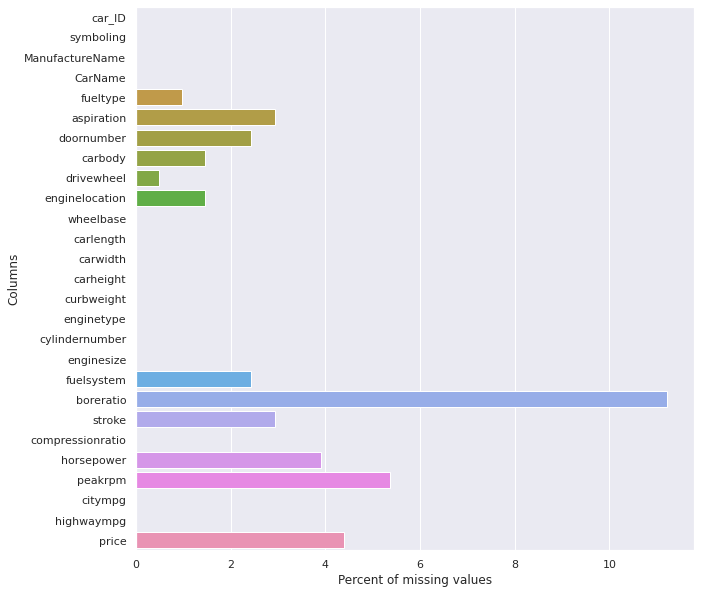

In [ ]:
list1 = []
list2 = [] 
for col in df.columns:
  list1.append(col) # 1 list lưu tất cả các cột trong dataframe
for col in df.columns:
  miss_data = df[col].isna().sum()
  miss_percent = round(miss_data / len(df) * 100 , 2) # tính phần trăm các dòng dữ liệu bị thiếu trong từng cột
  list2.append(miss_percent) # 1 list lưu tất cả các % của những dòng dữ liệu bị thiếu trong từng cột
d = {"Columns" : list1 ,
     "Percent of missing values" : list2 } 
df1 = pd.DataFrame(d)
plt.figure( figsize=(10,10))
sns.set(style = 'darkgrid')
sns.barplot(x = "Percent of missing values" , y ="Columns" , data = df1 );

**III.XỬ LÝ VÀ LÀM SẠCH DỮ LIỆU**

**1.Làm Sạch Dữ Liệu**

*Các cột giữ lại:


1.   Symboling


2.  ManufacturerName



3.   carName
4.  fueltype

5.  aspiration

6.   horsepower

7.  price








In [ ]:
# Loại bỏ các trường không cần thiết:
unnecessary = ['doornumber' , 'car_ID'  , 'carbody' , 'drivewheel','enginelocation','wheelbase','carlength' ,'carwidth','carheight' , 'curbweight' ,'enginetype' ,'cylindernumber','enginesize','fuelsystem', 'boreratio' ,'stroke' ,'compressionratio' ,'peakrpm','citympg','highwaympg']
df_new = df.drop(columns = unnecessary)
df_new.head()

,symboling,ManufactureName,CarName,fueltype,aspiration,horsepower,price
0,3,alfa,alfa-romero giulia,gas,std,111.0,13495.0
1,3,alfa,alfa-romero stelvio,gas,std,111.0,16500.0
2,1,alfa,alfa-romero Quadrifoglio,gas,std,-154.0,16500.0
3,2,audi,audi 100 ls,gas,std,102.0,13950.0
4,2,audi,audi 100ls,gas,std,115.0,17450.0


*Đổi tên các trường dữ liệu:
symboling(rủi ro bảo hiểm) => đổi thành safety level(mức độ an toàn)

In [ ]:
df_new.rename(columns = {'symboling' : 'safety_level'}, inplace= True)
df_new.head()

,safety_level,ManufactureName,CarName,fueltype,aspiration,horsepower,price
0,3,alfa,alfa-romero giulia,gas,std,111.0,13495.0
1,3,alfa,alfa-romero stelvio,gas,std,111.0,16500.0
2,1,alfa,alfa-romero Quadrifoglio,gas,std,-154.0,16500.0
3,2,audi,audi 100 ls,gas,std,102.0,13950.0
4,2,audi,audi 100ls,gas,std,115.0,17450.0


- Dữ liệu trong cột aspiration có giá trị là 'std' => chuyển thành natural(động cơ hút khí tự nhiên)
 

In [ ]:
# Kiểm tra ứng với mỗi giá trị trong 'aspiration' thì có bao nhiêu dòng
print(df_new['aspiration'].value_counts(dropna=False))
# Chuyển 'std' => 'natural'
df_new['aspiration'] = df_new['aspiration'].replace(['std'],'natural')
print(df_new['aspiration'].value_counts(dropna=False))



std      164
turbo     35
NaN        6
Name: aspiration, dtype: int64
natural    164
turbo       35
NaN          6
Name: aspiration, dtype: int64


*Xử lí những dòng dữ liệu có giá trị âm trong các cột:


* Sau khi dùng hàm describe() để mô tả dữ liệu của các cột dạng numerical 
=> cột horsepower(mã lực của xe) , price(giá xe) thì không thể có giá trị âm được



In [ ]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
safety_level,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
horsepower,197.0,98.832487,51.555175,-262.0,70.0,94.0,116.0,288.0
price,196.0,12757.354592,8063.074164,-18420.0,7775.0,10221.5,16106.0,41315.0


In [ ]:
# Chuyển đổi những giá trị âm thành dương trong trường horsepower và price bằng cách dùng hàm apply kết hợp với lambda function.

df_new['horsepower'] = df_new['horsepower'].apply(lambda x : x * -1 if x < 0 else x)
df_new['price'] = df_new['price'].apply(lambda x : x * -1 if x < 0 else x)


In [ ]:
df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
safety_level,205.0,0.834146,1.245307,-2.0,0.00,1.0,2.0,3.0
horsepower,197.0,104.081218,39.842976,48.0,70.00,95.0,116.0,288.0
price,196.0,13047.303571,7582.398121,5118.0,7796.25,10270.0,16447.5,41315.0


*Xử lí những dòng dữ liệu có giá trị null trong các cột:

> Xóa dòng có dữ liệu của cột nào có giá trị null


In [ ]:
from pandas.io.formats.style_render import Subset
# Kiểm tra những trường có giá trị null:
# => có 4 trường có giá trị null: price , horsepower ,aspiration , fueltype
df_new.isnull().sum().sort_values(ascending=False)

price              9
horsepower         8
aspiration         6
fueltype           2
safety_level       0
ManufactureName    0
CarName            0
dtype: int64

In [ ]:

# Xóa dòng có giá trị null trong cột price
df_new.dropna(subset = ['price'] , inplace = True)

In [ ]:
# Kiểm tra lại cột price:
df_new[df_new['price'].isna()]

,safety_level,ManufactureName,CarName,fueltype,aspiration,horsepower,price


In [ ]:
# Xóa dòng có giá trị null trong cột horsepower
df_new.dropna(subset = ['horsepower'] , inplace = True)

In [ ]:
# Kiểm tra lại cột horsepower:
df_new[df_new['horsepower'].isna()]

,safety_level,ManufactureName,CarName,fueltype,aspiration,horsepower,price


In [ ]:
# Xóa dòng có giá trị null trong cột aspiration
df_new.dropna(subset = ['aspiration'] , inplace = True)

In [ ]:
# Kiểm tra lại cột aspiration:
df_new[df_new['aspiration'].isna()]

,safety_level,ManufactureName,CarName,fueltype,aspiration,horsepower,price


In [ ]:
# Xóa dòng có giá trị null trong cột fueltype
df_new.dropna(subset = ['fueltype'] , inplace = True)

In [ ]:
# Kiểm tra lại cột fueltype:
df_new[df_new['fueltype'].isna()]

,safety_level,ManufactureName,CarName,fueltype,aspiration,horsepower,price


Kiểm tra lại sau khi đã xóa các trường có dữ liệu NULL

In [ ]:
df_new.isnull().sum().sort_values(ascending=False)

safety_level       0
ManufactureName    0
CarName            0
fueltype           0
aspiration         0
horsepower         0
price              0
dtype: int64

**2.Xử lí các ngoại lệ:**

a/ Xử lí trường Price: Sau khi trực quan hóa dữ liệu và xem xét trong thực tế thì thấy rằng những giá trị ngoại lai trong trường price có thể chấp nhận được vì có những chiếc xe giá trị có thể hơn 27.500$

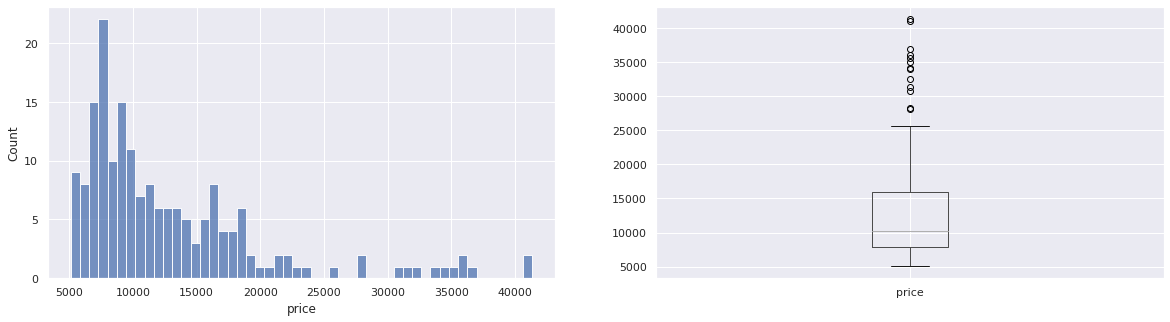

In [ ]:
# Trực quan hóa trường dữ liệu price bằng biểu đồ hist và boxplot 
fig , axes = plt.subplots(1,2,figsize = (20,5))
sns.histplot(data = df_new['price'] ,bins= 50 , ax = axes[0]);
df_new['price'].to_frame().boxplot(ax = axes[1], vert = True);

=> Dựa vào biểu đồ boxplot về sự phân bố của các giá trị trong trường price.Ta thấy có những dữ liệu ngoại lai xuất hiện từ price > 27.500$

In [ ]:
# Các giá trị nằm ngoài khoảng phân bố của trường price:
df_new[df_new['price'] > 27500]

,safety_level,ManufactureName,CarName,fueltype,aspiration,horsepower,price
15,0,bmw,bmw x4,gas,natural,182.0,30760.0
16,0,bmw,bmw x5,gas,natural,182.0,41315.0
17,0,bmw,bmw x3,gas,natural,182.0,36880.0
48,0,jaguar,jaguar xf,gas,natural,176.0,35550.0
49,0,jaguar,jaguar xk,gas,natural,262.0,36000.0
68,-1,buick,buick century luxus (sw),diesel,turbo,123.0,28248.0
69,0,buick,buick century,diesel,turbo,123.0,28176.0
71,-1,buick,buick opel isuzu deluxe,gas,natural,155.0,34184.0
72,3,buick,buick skylark,gas,natural,155.0,35056.0
73,0,buick,buick century special,gas,natural,184.0,40960.0


In [ ]:
df_new['price'].describe().transpose()

count      182.000000
mean     12906.222527
std       7465.537191
min       5118.000000
25%       7823.000000
50%      10221.500000
75%      15926.250000
max      41315.000000
Name: price, dtype: float64

b/ Xử lí trường horsepower:Sau khi trực quan hóa dữ liệu và xem xét trong thực tế thì thấy rằng những giá trị ngoại lai trong trường horsepower có thể chấp nhận được vì mã lực của những chiếc xe hiệu năng cao/thể thao có thể trên 195 mã lực

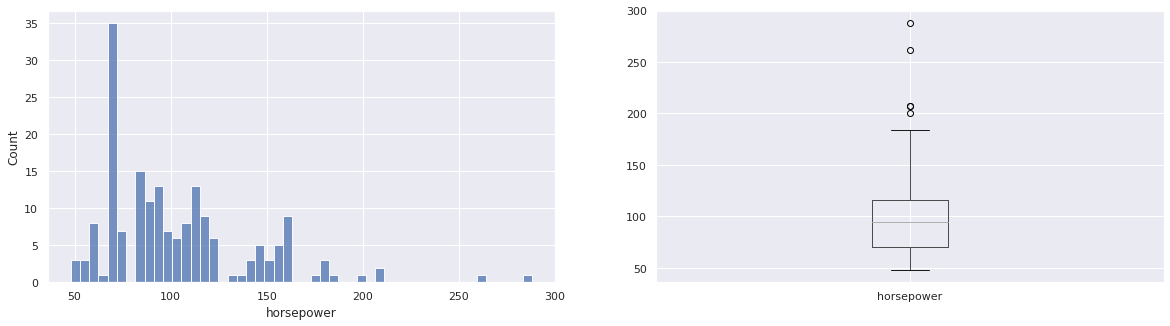

In [ ]:
# Trực quan hóa trường dữ liệu horsepower bằng biểu đồ hist và boxplot 
fig , axes = plt.subplots(1,2,figsize = (20,5))
sns.histplot(data = df_new['horsepower'] ,bins= 50 , ax = axes[0]);
df_new['horsepower'].to_frame().boxplot(ax = axes[1], vert = True);

=> Dựa vào biểu đồ boxplot về sự phân bố của các giá trị trong trường horsepower.Ta thấy có những dữ liệu ngoại lai xuất hiện từ horsepower > 195

In [ ]:
df_new[df_new['horsepower'] >= 195]

,safety_level,ManufactureName,CarName,fueltype,aspiration,horsepower,price
49,0,jaguar,jaguar xk,gas,natural,262.0,36000.0
105,3,nissan,nissan kicks,gas,turbo,200.0,19699.0
126,3,porsche,porcshce panamera,gas,natural,207.0,32528.0
127,3,porsche,porsche cayenne,gas,natural,207.0,34028.0
129,1,porsche,porsche cayenne,gas,natural,288.0,31400.5


In [ ]:
df_new['horsepower'].describe().transpose()

count    182.000000
mean     103.521978
std       39.223500
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

**IV/Phân tích và khám phá dữ liệu:**

1.**Trực quan hóa dữ liệu các trường categorical**


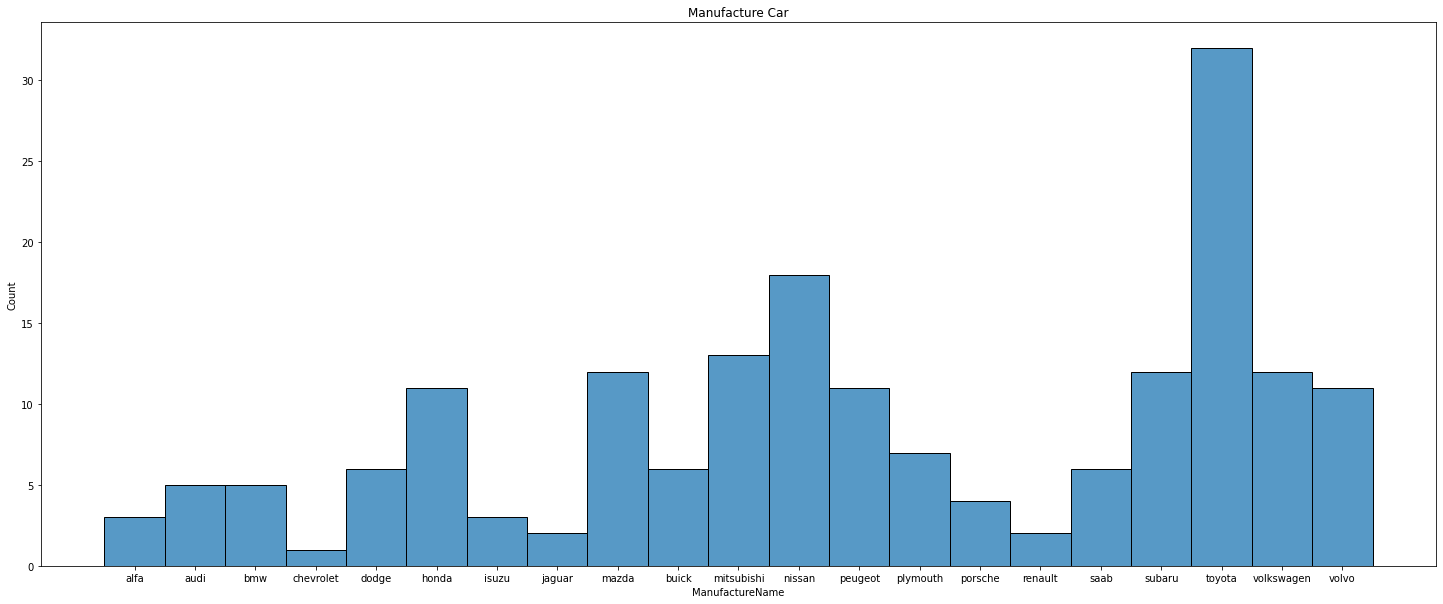

In [ ]:

plt.figure(figsize = (25,10))
plt.title("Manufacture Car")
sns.histplot(data = df_new['ManufactureName'] ,bins= 50);



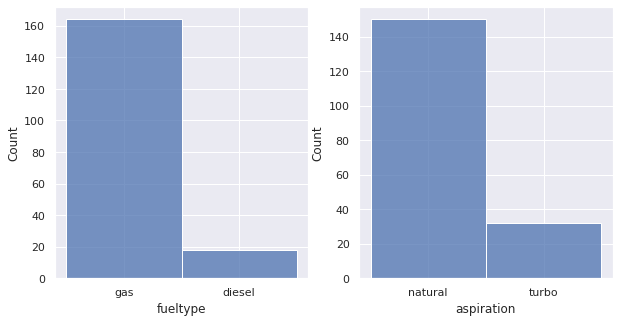

In [ ]:
fig , axes = plt.subplots(1 , 2 , figsize=(10,5))
sns.histplot(data = df_new['fueltype'] ,bins= 2 , ax = axes[0])
sns.histplot(data = df_new['aspiration'] ,bins= 2 , ax = axes[1]);


2.**Trực quan hóa dữ liệu các trường numerical**

Dựa vào biểu đồ complex histogram ,ta thấy:


* Những giá trị của trường safety_level chủ yếu tập chung nằm trong khoảng từ -1 -> 3
* Những giá trị của trường horsepower chủ yếu tập chung nằm trong khoảng từ 65 -> 120 mã lực
* Những giá trị của trường price chủ yếu tập chung nằm trong khoảng từ 50.000$ -> 185.000$ 



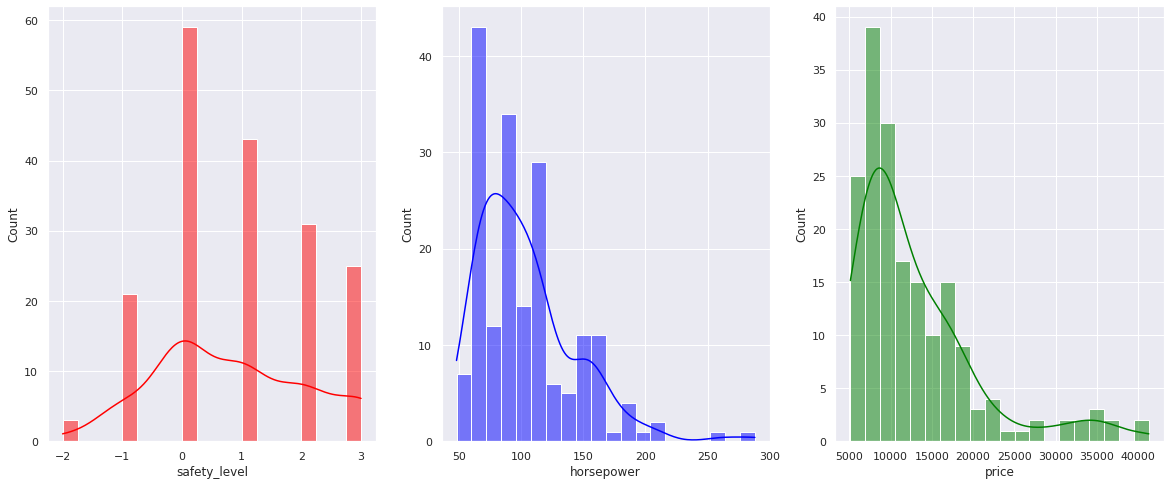

In [ ]:
# Trực quan hóa dữ liệu bằng biểu đổ complex histogram
fig , axes = plt.subplots(1 , 3 , figsize=(20,8))
sns.histplot(data = df_new['safety_level'] , bins = 20, ax = axes[0] , kde = True , color = 'red')
sns.histplot(data = df_new['horsepower'], bins = 20, ax = axes[1], kde = True , color = 'blue')
sns.histplot(data = df_new['price'], bins = 20, ax = axes[2], kde = True , color = 'green');

**3.Mối quan hệ giữa các trường 'Price' với các trường khác:**

**a/Mối quan hệ giữa 'Price' và 'Horsepower'** 

8906.532110091743
15539.62
26136.5


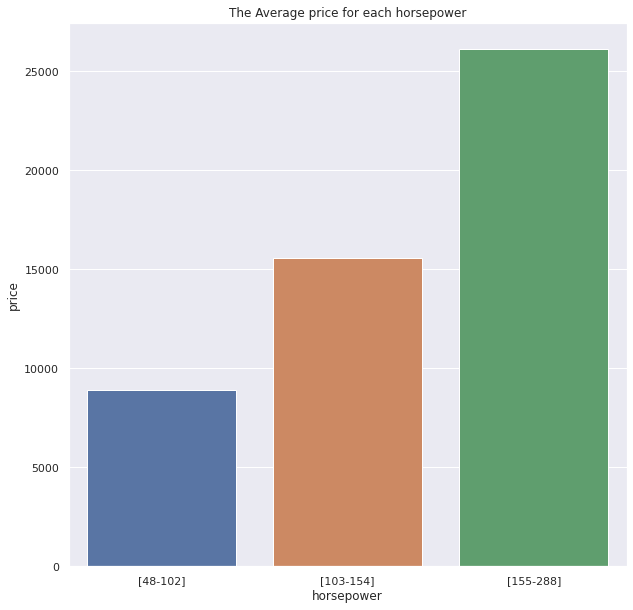

In [ ]:
df2 = df_new[df_new['horsepower'].between(48,102)]
tb2 = df2['price'].mean()
df3 = df_new[df_new['horsepower'].between(103,154)]
tb3 = df3['price'].mean()
df4 = df_new[df_new['horsepower'].between(155,288)]
tb4 = df4['price'].mean()
# trung bình giá từ 48 -> 102 mã lực:
print(tb2)
# trung bình giá từ 103 -> 154 mã lực:
print(tb3)
# trung bình giá từ 155 -> 288 mã lực:
print(tb4)
plt.figure(figsize = (10,10))
plt.title("The Average price for each horsepower")
df5 = pd.DataFrame({'horsepower': ['[48-102]','[103-154]','[155-288]'],
                    'price' : [tb2,tb3,tb4] 
                   })

sns.barplot(x = 'horsepower' , y = 'price' , data = df5 , ci = None);

**b/Mối quan hệ giữa 'Price' và 'Aspiration'**


> Nhìn vào biểu đồ ta thấy,giá của những động cơ turbo cao hơn động cơ natural



12189.18
16267.34


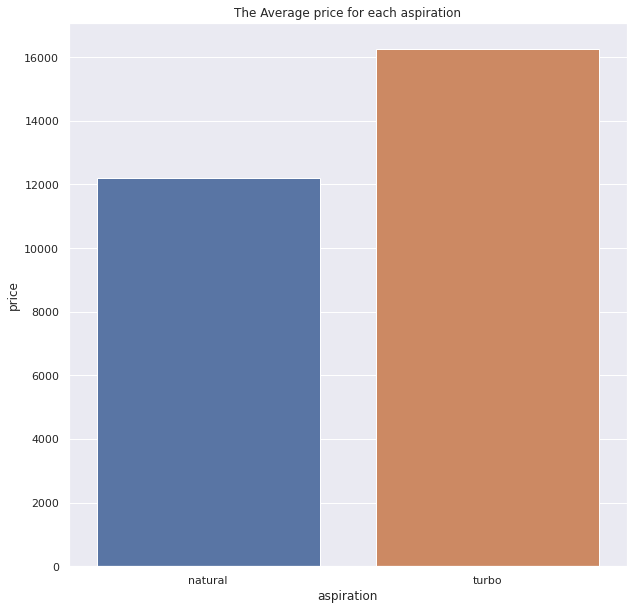

In [ ]:

df6 = df_new[df_new['aspiration'] == 'natural']
tb6 = round(df6['price'].mean(),2)
df7 = df_new[df_new['aspiration'] == 'turbo']
tb7 = round(df7['price'].mean(),2)
print(tb6)
print(tb7)
df8 = pd.DataFrame({'aspiration' : ['natural' , 'turbo'] ,
                    'price' : [tb6,tb7] 
                   })
plt.figure(figsize = (10,10))
plt.title("The Average price for each aspiration")
sns.barplot(x = 'aspiration' , y = 'price' , data = df8 , ci = None);

**c/Mối quan hệ giữa 'Price' và 'Fueltype'**




> Nhìn vào biểu đồ ta thấy,giá của những xe chạy bằng dầu cao hơn chạy bằng xăng



12695.81
14823.28


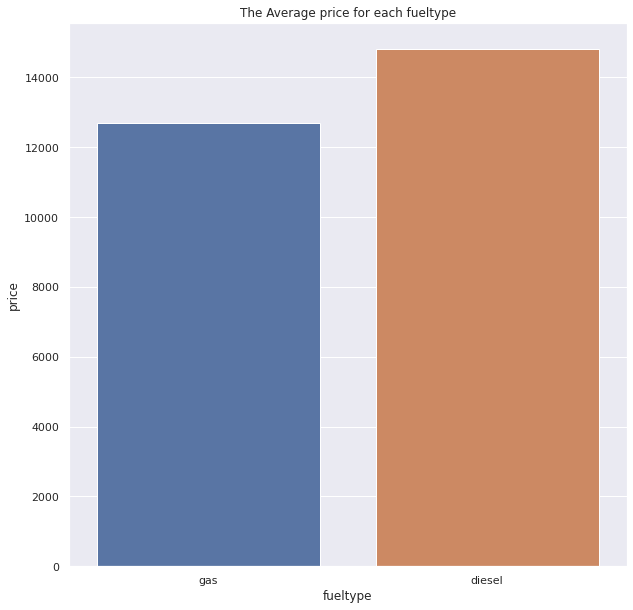

In [ ]:
df9 = df_new[df_new['fueltype'] == 'gas']
tb9 = round(df9['price'].mean(),2)
df10 = df_new[df_new['fueltype'] == 'diesel']
tb10 = round(df10['price'].mean(),2)
print(tb9)
print(tb10)
df11 = pd.DataFrame({'fueltype' : ['gas' , 'diesel'] ,
                    'price' : [tb9,tb10] 
                   })
plt.figure(figsize = (10,10))
plt.title("The Average price for each fueltype")
sns.barplot(x = 'fueltype' , y = 'price' , data = df11 , ci = None , );

**d/Mối quan hệ giữa 'Price' và 'Safety_level'**


> Nhìn chung , xe có mức độ an toàn càng cao thì giá cũng càng cao.Nhưng còn phụ thuộc vào nhiều yếu tố khác tác động đến như: tùy vào từng nhà sản xuất , dòng xe(phổ thông,trung cấp,gia đình,hạng sang,...)


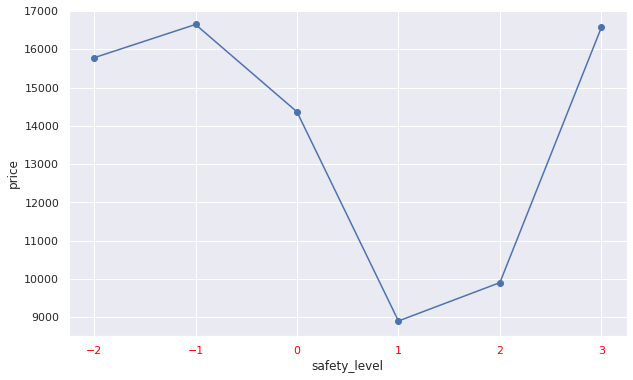

In [ ]:
df_new[['price','safety_level']].head()
df23 = df_new[df_new['safety_level'] == -2]
tb23 = round(df23['price'].mean(),2)
df24 = df_new[df_new['safety_level'] == -1]
tb24 = round(df24['price'].mean(),2)
df25 = df_new[df_new['safety_level'] == 0]
tb25= round(df25['price'].mean(),2)
df26= df_new[df_new['safety_level'] == 1]
tb26 = round(df26['price'].mean(),2)
df27 = df_new[df_new['safety_level'] == 2]
tb27 = round(df27['price'].mean(),2)
df28 = df_new[df_new['safety_level'] == 3]
tb28= round(df28['price'].mean(),2)
df22 = pd.DataFrame({'safety_level' : [-2,-1,0,1,2,3] ,
                    'price' : [tb23,tb24,tb25,tb26,tb27,tb28] 
                   })
listX = [-2,-1,0,1,2,3]
listY = [tb23,tb24,tb25,tb26,tb27,tb28]
plt.figure(figsize = (10,6))
plt.xlabel("safety_level")
plt.ylabel("price")
plt.tick_params(axis = 'x' , colors = 'red' , direction = 'inout' , length = 13 , width = 3)
plt.plot(listX,listY , marker = 'o');
# x = 'safety_level' , y = 'price' , data = df2)

**e/Mối quan hệ giữa 'Price' và 'ManufactureName'**



Dựa vào hàm value_counts() để lấy Top 10 những hãng xe thông dụng nhất để khảo sát



In [ ]:

df_new['ManufactureName'].value_counts()

toyota        32
nissan        18
mitsubishi    13
mazda         12
volkswagen    12
subaru        12
peugeot       11
volvo         11
honda         11
plymouth       7
buick          6
saab           6
dodge          6
audi           5
bmw            5
porsche        4
isuzu          3
alfa           3
jaguar         2
renault        2
chevrolet      1
Name: ManufactureName, dtype: int64

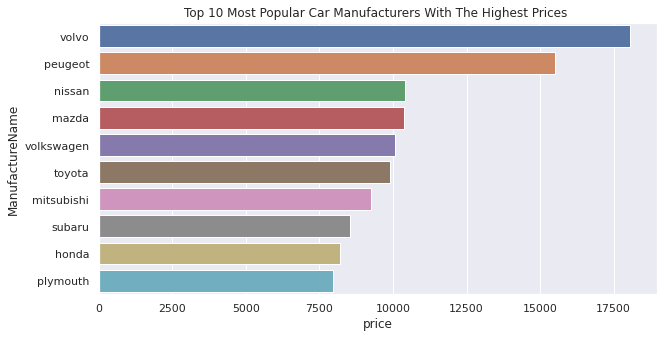

In [ ]:
# df12 = df_new.groupby("ManufactureName")
# print(df12['price'].mean().sort_values(ascending = False))
df12 = df_new[df_new['ManufactureName'] == 'toyota']
tb12 = round(df12['price'].mean(),2)
df13 = df_new[df_new['ManufactureName'] == 'nissan']
tb13 = round(df13['price'].mean(),2)
df14 = df_new[df_new['ManufactureName'] == 'mitsubishi']
tb14= round(df14['price'].mean(),2)
df15= df_new[df_new['ManufactureName'] == 'mazda']
tb15 = round(df15['price'].mean(),2)
df16 = df_new[df_new['ManufactureName'] == 'volkswagen']
tb16 = round(df16['price'].mean(),2)
df17 = df_new[df_new['ManufactureName'] == 'subaru']
tb17= round(df17['price'].mean(),2)
df18 = df_new[df_new['ManufactureName'] == 'peugeot']
tb18 = round(df18['price'].mean(),2)
df19 = df_new[df_new['ManufactureName'] == 'volvo']
tb19 = round(df19['price'].mean(),2)
df20 = df_new[df_new['ManufactureName'] == 'honda']
tb20 = round(df20['price'].mean(),2)
df21 = df_new[df_new['ManufactureName'] == 'plymouth']
tb21 = round(df21['price'].mean(),2)
df22 = pd.DataFrame({'ManufactureName' : ['volvo', 'peugeot','nissan', 'mazda' ,'volkswagen','toyota','mitsubishi','subaru','honda','plymouth'] ,
                    'price' : [tb19,tb18,tb13,tb15,tb16,tb12,tb14,tb17,tb20,tb21] 
                   })
plt.figure(figsize = (10,5))
plt.title("Top 10 Most Popular Car Manufacturers With The Highest Prices ")
sns.barplot(x = 'price' , y = 'ManufactureName' , data = df22 , ci = None);

In [ ]:
df_new.head()

,safety_level,ManufactureName,CarName,fueltype,aspiration,horsepower,price
0,3,alfa,alfa-romero giulia,gas,natural,111.0,13495.0
1,3,alfa,alfa-romero stelvio,gas,natural,111.0,16500.0
2,1,alfa,alfa-romero Quadrifoglio,gas,natural,154.0,16500.0
3,2,audi,audi 100 ls,gas,natural,102.0,13950.0
4,2,audi,audi 100ls,gas,natural,115.0,17450.0


**f/Mối quan hệ giữa 'Price' và 'ManufactureName' và 'safety_level'**

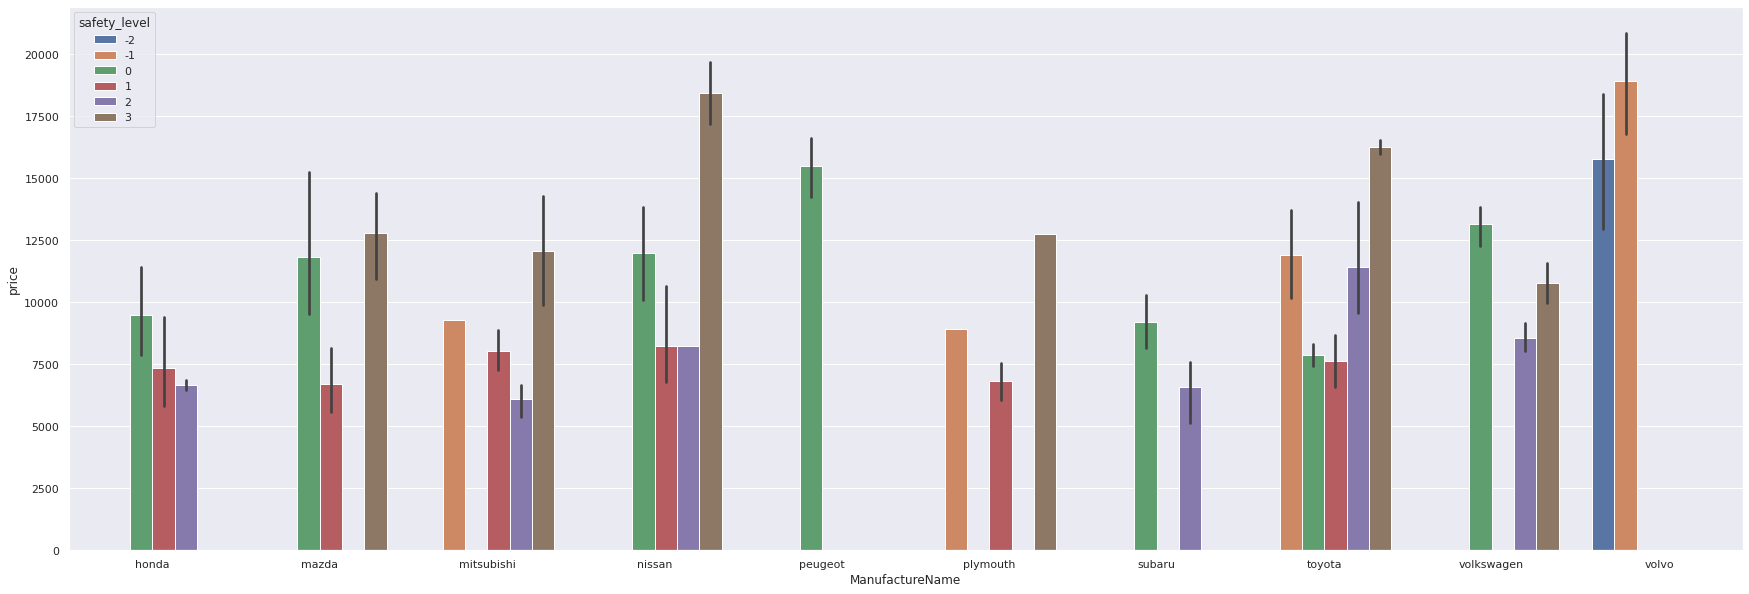

In [ ]:

dtframe = df_new[df_new['ManufactureName'].isin(['toyota','nissan','mitsubishi','mazda','volkswagen','subaru','peugeot','volvo','honda','plymouth'])]
plt.figure(figsize=(30,10))
sns.barplot(x = 'ManufactureName' , y = 'price' , data = dtframe, hue = 'safety_level');

**g//Mối quan hệ giữa 'Price' và 'CarName'**

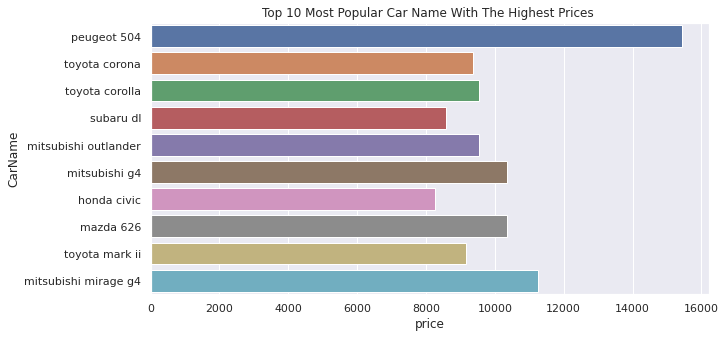

In [ ]:
df_new['CarName'].value_counts()
df31 = df_new[df_new['CarName'] == 'peugeot 504']
tb31 = round(df31['price'].mean(),2)
df32 = df_new[df_new['CarName'] == 'toyota corona']
tb32 = round(df32['price'].mean(),2)
df33 = df_new[df_new['CarName'] == 'toyota corolla']
tb33= round(df33['price'].mean(),2)
df34= df_new[df_new['CarName'] == 'subaru dl']
tb34 = round(df34['price'].mean(),2)
df35 = df_new[df_new['CarName'] == 'mitsubishi outlander']
tb35 = round(df35['price'].mean(),2)
df36 = df_new[df_new['CarName'] == 'mitsubishi g4']
tb36= round(df36['price'].mean(),2)
df37 = df_new[df_new['CarName'] == 'honda civic']
tb37 = round(df37['price'].mean(),2)
df38 = df_new[df_new['CarName'] == 'mazda 626']
tb38 = round(df38['price'].mean(),2)
df39 = df_new[df_new['CarName'] == 'toyota mark ii']
tb39 = round(df39['price'].mean(),2)
df40 = df_new[df_new['CarName'] == 'mitsubishi mirage g4']
tb40 = round(df40['price'].mean(),2)
df41 = pd.DataFrame({'CarName' : ['peugeot 504' ,'toyota corona' ,'toyota corolla' ,'subaru dl' ,'mitsubishi outlander' ,'mitsubishi g4', 'honda civic' ,'mazda 626', 'toyota mark ii' ,'mitsubishi mirage g4'] ,
                    'price' : [tb31,tb32,tb33,tb34,tb35,tb36,tb37,tb38,tb39,tb40]
                   })
plt.figure(figsize = (10,5))
plt.title("Top 10 Most Popular Car Name With The Highest Prices ")
sns.barplot(x = 'price' , y = 'CarName' , data = df41 , ci = None);


**h/Mối quan hệ giữa 'Price' và 'ManufactureName' và 'aspiration'**

So sánh giá xe của 2 loại động cơ natural và turbo của từng nhà sản xuất(lấy Top 10) với nhau xem có sự chênh lệch ntn.


> Nhìn vào biểu đồ ta thấy được , đa số giá xe ở các nhà sản xuất có động cơ turbo có giá cao hơn xe có động cơ natural



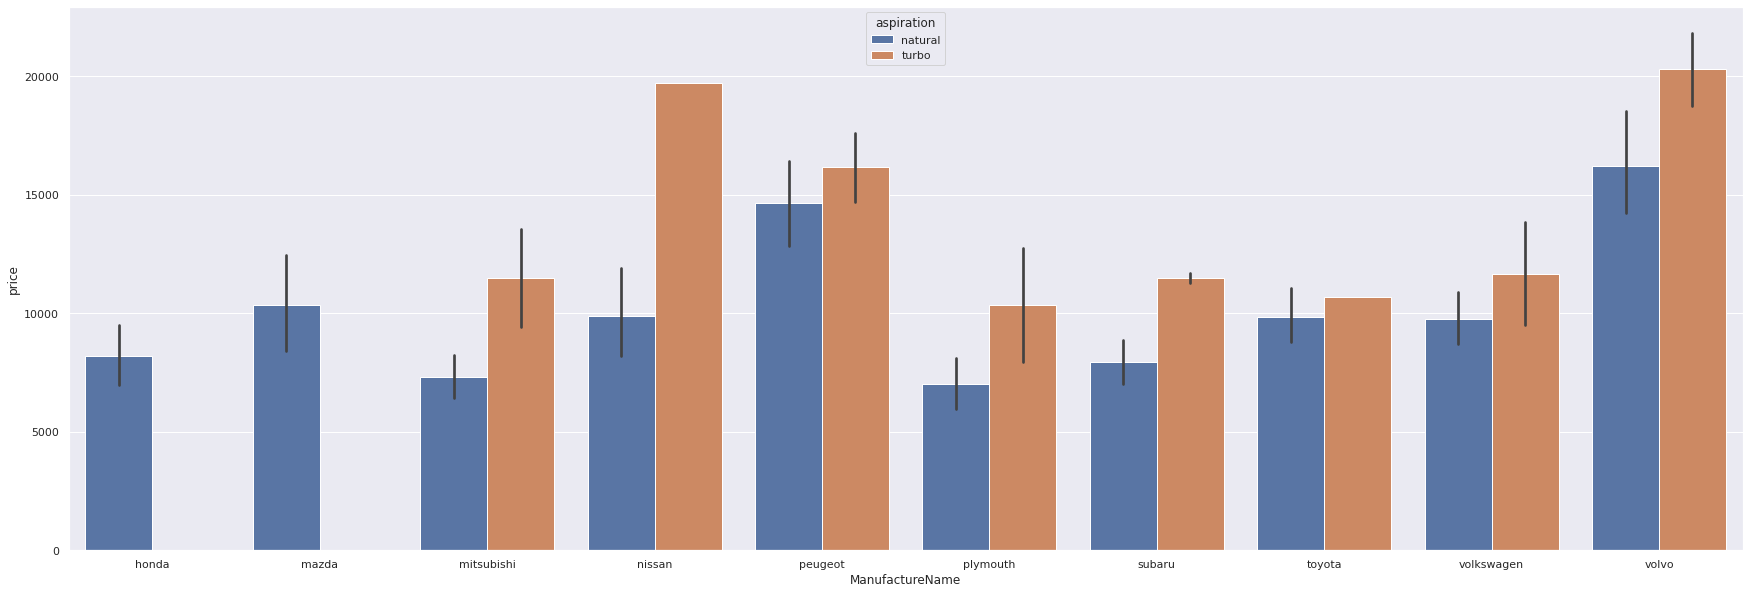

In [ ]:
dtframe = df_new[df_new['ManufactureName'].isin(['toyota','nissan','mitsubishi','mazda','volkswagen','subaru','peugeot','volvo','honda','plymouth'])]
plt.figure(figsize=(30,10))
sns.barplot(x = 'ManufactureName' , y = 'price' , data = dtframe, hue = 'aspiration');

**h/Mối quan hệ giữa 'Price' và 'ManufactureName' và 'fueltype'**

So sánh giá xe của 2 loại nhiên liệu gas và diesel của từng nhà sản xuất(lấy Top 10) với nhau xem có sự chênh lệch ntn.


> Nhìn vào biểu đồ ta thấy được sự chệnh lệnh giá xe chạy bằng gas và diesel không rõ ràng giữa các hãng sản xuất.Tùy từng hãng xe thì họ định giá xe chạy bằng xăng và dầu khác nhau.



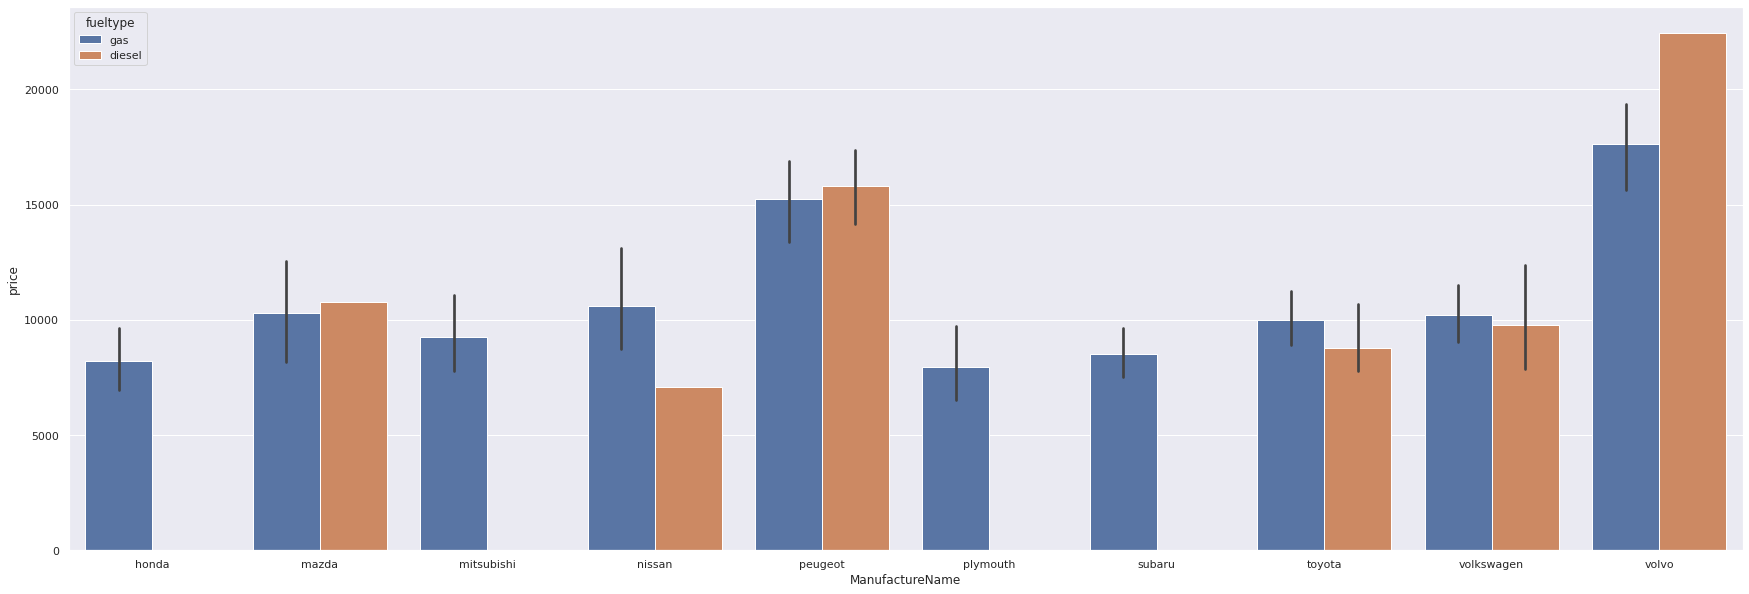

In [ ]:
dtframe = df_new[df_new['ManufactureName'].isin(['toyota','nissan','mitsubishi','mazda','volkswagen','subaru','peugeot','volvo','honda','plymouth'])]
plt.figure(figsize=(30,10))
sns.barplot(x = 'ManufactureName' , y = 'price' , data = dtframe, hue = 'fueltype');

**V/Chuẩn bị dữ liệu**

**1.Tách dữ liệu thành các tập X(đầu vào) và tập y(đầu ra)**

In [ ]:
X = df_new[['safety_level','fueltype','aspiration','horsepower']]
y = df_new['price']

In [ ]:
# Các trường có trong tập X và y
X.head()

,safety_level,fueltype,aspiration,horsepower
0,3,gas,natural,111.0
1,3,gas,natural,111.0
2,1,gas,natural,154.0
3,2,gas,natural,102.0
4,2,gas,natural,115.0


In [ ]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

**2.Mã hóa các biến Categorical**

**a/Mã hóa trường fueltype:**

In [ ]:
# Chuyển đổi giá trị 'gas' => 0 và 'diesel' => 1
X['fueltype'] = X['fueltype'].apply(lambda x: 0 if x == 'gas' else 1)
X.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,safety_level,fueltype,aspiration,horsepower
0,3,0,natural,111.0
1,3,0,natural,111.0
2,1,0,natural,154.0
3,2,0,natural,102.0
4,2,0,natural,115.0
5,2,0,natural,110.0
6,1,0,natural,110.0
8,1,0,turbo,140.0
12,0,0,natural,121.0
13,0,0,natural,121.0


In [ ]:
X['fueltype'].value_counts()

0    164
1     18
Name: fueltype, dtype: int64

**b/Mã hóa trường aspiration**

In [ ]:
# Chuyển đổi giá trị 'natural' => 0 và 'turbo' => 1
X['aspiration'] = X['aspiration'].apply(lambda x: 0 if x == 'natural' else 1)
X.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,safety_level,fueltype,aspiration,horsepower
0,3,0,0,111.0
1,3,0,0,111.0
2,1,0,0,154.0
3,2,0,0,102.0
4,2,0,0,115.0
5,2,0,0,110.0
6,1,0,0,110.0
8,1,0,1,140.0
12,0,0,0,121.0
13,0,0,0,121.0


In [ ]:
X['aspiration'].value_counts()

0    150
1     32
Name: aspiration, dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 204
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   safety_level  182 non-null    int64  
 1   fueltype      182 non-null    int64  
 2   aspiration    182 non-null    int64  
 3   horsepower    182 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 7.1 KB


**C/Cắt dữ liệu thành tập train và test**

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state = 6)

**VI/Chọn,Xây Dựng Và Đánh Giá Mô Hình**

* đánh giá mô hình:
1. mse:tổng bình phương sai số trên tập mẫu
2. rmse: căn của tổng bình phương sai số trên tập mẫu
3. mae : trị tuyệt đối trung bình

**1/Mô hình hồi quy tuyến tính( Linear Models)**

In [ ]:
from sklearn import linear_model , metrics
import time
from sklearn.metrics import r2_score


In [ ]:
# Đầu vào(tập X)
# Đầu ra (tập y)
model = linear_model.LinearRegression()
model.fit(X_train,y_train) # bước traning dữ liệu 
start = time.time()
print('Giá xe dự đoán: ' , model.predict(X_test.head()))	
end = time.time()
print("Thời gian chạy mô hình: " , end - start)


Giá xe dự đoán:  [13352.27504174 16455.07642439 37652.90926669 21150.2610824
 25072.57093455]
Thời gian chạy mô hình:  0.0059278011322021484


**Đánh giá mô hình:**

In [ ]:
# 1. mse:tổng bình phương sai số trên tập mẫu
mse_linear = metrics.mean_squared_error(y_test.head(),model.predict(X_test.head()))

# 2. rmse: căn của tổng bình phương sai số trên tập mẫu
rmse_linear = np.sqrt(mse_linear)

# 3. mae : trị tuyệt đối trung bình
mae_linear = metrics.mean_absolute_error(y_test.head(),model.predict(X_test.head()))

# 4.r2_score(): đánh giá xem mô hình có phù hợp và tốt hay không, trả về giá trị nằm trong khoảng từ 0 đến 1, 
# với giá trị 0 có nghĩa là không có mối quan hệ, với giá trị là 1 có nghĩa là mô hình phù hợp và tốt 100%.
r2_linear = r2_score(y_test.head() , model.predict(X_test.head()))

print('MSE: ' , mse_linear)
print('RMSE: ' , rmse_linear)
print('MAE: ' , mae_linear)
print('R2_score: ' , r2_linear)

MSE:  69468380.74737424
RMSE:  8334.76938777398
MAE:  6556.375726478288
R2_score:  0.40239392754255177


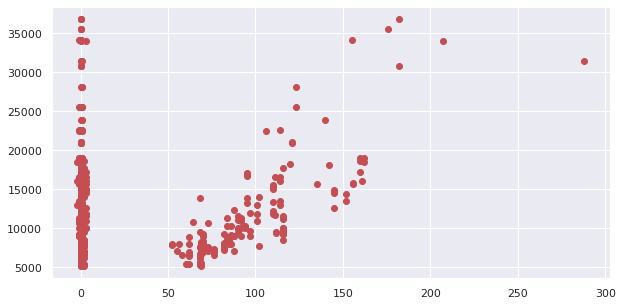

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'ro');

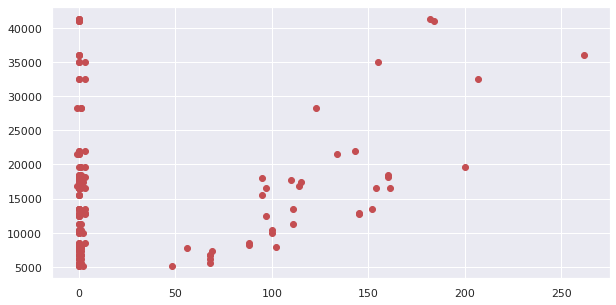

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(X_test, y_test, 'ro');

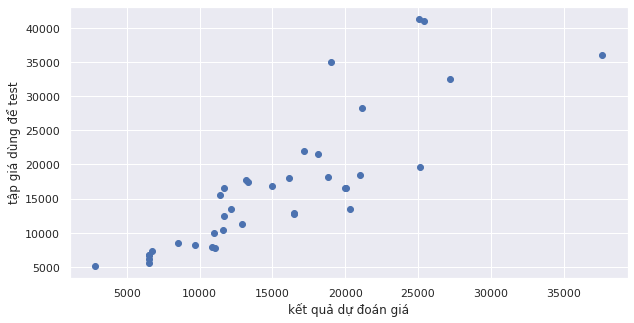

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel("kết quả dự đoán giá")
plt.ylabel("tập giá dùng để test")
plt.scatter(model.predict(X_test)  , y_test);

**Chênh lệch giữa giá xe trên tập test và giá xe dự đoán với mô hình hồi quy tuyến tính**


In [ ]:
y_predict_1 = model.predict(X_test.head())
for i in range(len(y_predict_1)):
  y_predict_1[i] = round(y_predict_1[i],0)

moi = pd.DataFrame({'y_test' : y_test.head(),
                    'y_predict' : y_predict_1,
                    'độ lệch': y_predict_1 - y_test.head()})
moi.head(37)

,y_test,y_predict,độ lệch
4,17450.0,13352.0,-4098.0
124,12764.0,16455.0,3691.0
49,36000.0,37653.0,1653.0
68,28248.0,21150.0,-7098.0
16,41315.0,25073.0,-16242.0


**2/Mô hình Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
start = time.time()
model_tree = tree.DecisionTreeRegressor(random_state = 6).fit(X_train,y_train) # training dữ liệu
y_predict_2 = model_tree.predict(X_test.head()) 
end = time.time()
print('Giá xe dự đoán: ' , y_predict_2)	
end = time.time()
print("Thời gian chạy mô hình: " , end - start)


Giá xe dự đoán:  [11415.66666667 13995.66666667 31400.5        25552.
 33820.        ]
Thời gian chạy mô hình:  0.012447595596313477


**Đánh giá mô hình**

In [ ]:
# 1. mse:tổng bình phương sai số trên tập mẫu
mse_tree = metrics.mean_squared_error(y_test.head(),y_predict_2)

# 2. rmse: căn của tổng bình phương sai số trên tập mẫu
rmse_tree = np.sqrt(mse_tree)

# 3. mae : trị tuyệt đối trung bình
mae_tree = metrics.mean_absolute_error(y_test.head(),y_predict_2)

# 4.r2_score(): đánh giá xem mô hình có phù hợp và tốt hay không, trả về giá trị nằm trong khoảng từ 0 đến 1, 
# với giá trị 0 có nghĩa là không có mối quan hệ, với giá trị là 1 có nghĩa là mô hình phù hợp và tốt 100%.
r2_tree = r2_score(y_test.head() , y_predict_2)

print('MSE: ' , mse_tree)
print('RMSE: ' , rmse_tree)
print('MAE: ' , mae_tree)
print('R2_score: ' , r2_tree)

MSE:  24505804.56111111
RMSE:  4950.333782797996
MAE:  4411.3
R2_score:  0.7891872898343182


**Chênh lệch giữa giá xe trên tập test và giá xe dự đoán với mô hình Decision Tree**


In [ ]:

for i in range(len(y_predict_2)):
  y_predict_2[i] = round(y_predict_2[i],0)

moi_tree = pd.DataFrame({'y_test' : y_test.head(),
                    'y_predict' : y_predict_2,
                    'độ lệch': y_predict_2 - y_test.head()})
moi_tree.head(37)

,y_test,y_predict,độ lệch
4,17450.0,11416.0,-6034.0
124,12764.0,13996.0,1232.0
49,36000.0,31400.0,-4600.0
68,28248.0,25552.0,-2696.0
16,41315.0,33820.0,-7495.0


**3/Mô hình Random forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

In [ ]:
start = time.time()
model_rand = RandomForestRegressor(random_state = 6).fit(X_train,y_train) # training dữ liệu
y_predict_3 = model_rand.predict(X_test.head()) 
end = time.time()
print('Giá xe dự đoán: ' , y_predict_3)	
end = time.time()
print("Thời gian chạy mô hình: " , end - start)


Giá xe dự đoán:  [13336.40005495 14166.4865873  32741.29       25697.925
 33521.59      ]
Thời gian chạy mô hình:  0.136336088180542


**Đánh giá mô hình**

In [ ]:
# 1. mse:tổng bình phương sai số trên tập mẫu
mse_rand = metrics.mean_squared_error(y_test.head(),y_predict_3)

# 2. rmse: căn của tổng bình phương sai số trên tập mẫu
rmse_rand = np.sqrt(mse_rand)

# 3. mae : trị tuyệt đối trung bình
mae_rand = metrics.mean_absolute_error(y_test.head(),y_predict_3)

# 4.r2_score(): đánh giá xem mô hình có phù hợp và tốt hay không, trả về giá trị nằm trong khoảng từ 0 đến 1, 
# với giá trị 0 có nghĩa là không có mối quan hệ, với giá trị là 1 có nghĩa là mô hình phù hợp và tốt 100%.
r2_rand = r2_score(y_test.head() , y_predict_3)

print('MSE: ' , mse_rand)
print('RMSE: ' , rmse_rand)
print('MAE: ' , mae_rand)
print('R2_score: ' , r2_rand)

MSE:  19349597.186668396
RMSE:  4398.8177032775975
MAE:  3823.6563064713073
R2_score:  0.8335438849451566


**Chênh lệch giữa giá xe trên tập test và giá xe dự đoán với mô hình Random forest**


In [ ]:

for i in range(len(y_predict_3)):
  y_predict_3[i] = round(y_predict_3[i],0)

moi_rand = pd.DataFrame({'y_test' : y_test.head(),
                    'y_predict' : y_predict_3,
                    'độ lệch': y_predict_3 - y_test.head()})
moi_rand.head()

,y_test,y_predict,độ lệch
4,17450.0,13336.0,-4114.0
124,12764.0,14166.0,1402.0
49,36000.0,32741.0,-3259.0
68,28248.0,25698.0,-2550.0
16,41315.0,33522.0,-7793.0


**4/Mô hình Gradient Boosting**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [ ]:

from catboost import Pool, CatBoostRegressor

In [ ]:
start = time.time()
model_cat = CatBoostRegressor(random_state = 6).fit(X_train,y_train) # training dữ liệu
y_predict_4 = model_cat.predict(X_test.head()) 
end = time.time()

print('Giá xe dự đoán: ' , y_predict_4)	
end = time.time()
print("Thời gian chạy mô hình: " , end - start)


Learning rate set to 0.030177
0:	learn: 6310.4946021	total: 46.4ms	remaining: 46.4s
1:	learn: 6211.2953750	total: 47.2ms	remaining: 23.6s
2:	learn: 6112.2549317	total: 48ms	remaining: 15.9s
3:	learn: 6031.7314885	total: 48.6ms	remaining: 12.1s
4:	learn: 5936.6328374	total: 49.1ms	remaining: 9.78s
5:	learn: 5847.3653484	total: 49.7ms	remaining: 8.23s
6:	learn: 5759.6996493	total: 50.2ms	remaining: 7.12s
7:	learn: 5679.8431006	total: 50.8ms	remaining: 6.3s
8:	learn: 5605.1955470	total: 51.3ms	remaining: 5.65s
9:	learn: 5542.3776416	total: 51.8ms	remaining: 5.13s
10:	learn: 5474.3091923	total: 52.3ms	remaining: 4.7s
11:	learn: 5400.2461837	total: 52.8ms	remaining: 4.34s
12:	learn: 5326.6162923	total: 53.3ms	remaining: 4.05s
13:	learn: 5247.7621531	total: 53.9ms	remaining: 3.8s
14:	learn: 5174.3215913	total: 54.5ms	remaining: 3.58s
15:	learn: 5095.9843445	total: 55ms	remaining: 3.38s
16:	learn: 5039.2357229	total: 55.6ms	remaining: 3.22s
17:	learn: 4973.8590263	total: 56.2ms	remaining: 3.0

**Đánh giá mô hình**

In [ ]:
# 1. mse:tổng bình phương sai số trên tập mẫu
mse_cat = metrics.mean_squared_error(y_test.head(),y_predict_4)

# 2. rmse: căn của tổng bình phương sai số trên tập mẫu
rmse_cat = np.sqrt(mse_cat)

# 3. mae : trị tuyệt đối trung bình
mae_cat = metrics.mean_absolute_error(y_test.head(),y_predict_4)

# 4.r2_score(): đánh giá xem mô hình có phù hợp và tốt hay không, trả về giá trị nằm trong khoảng từ 0 đến 1, 
# với giá trị 0 có nghĩa là không có mối quan hệ, với giá trị là 1 có nghĩa là mô hình phù hợp và tốt 100%.
r2_cat = r2_score(y_test.head() , y_predict_4)

print('MSE: ' , mse_cat)
print('RMSE: ' , rmse_cat)
print('MAE: ' , mae_cat)
print('R2_score: ' , r2_cat)

MSE:  16268402.867843961
RMSE:  4033.410823093026
MAE:  3446.083742465062
R2_score:  0.8600500509956799


**Chênh lệch giữa giá xe trên tập test và giá xe dự đoán với mô hình Gradient Boosting**


In [ ]:

for i in range(len(y_predict_4)):
  y_predict_4[i] = round(y_predict_4[i],0)

moi_cat = pd.DataFrame({'y_test' : y_test.head(),
                    'y_predict' : y_predict_4,
                    'độ lệch': y_predict_4 - y_test.head()})
moi_cat.head()

,y_test,y_predict,độ lệch
4,17450.0,13813.0,-3637.0
124,12764.0,14024.0,1260.0
49,36000.0,33238.0,-2762.0
68,28248.0,26020.0,-2228.0
16,41315.0,33971.0,-7344.0


**5/So Sánh Giữa Các Mô Hình**

**a/Chỉ số đánh giá MAE:**

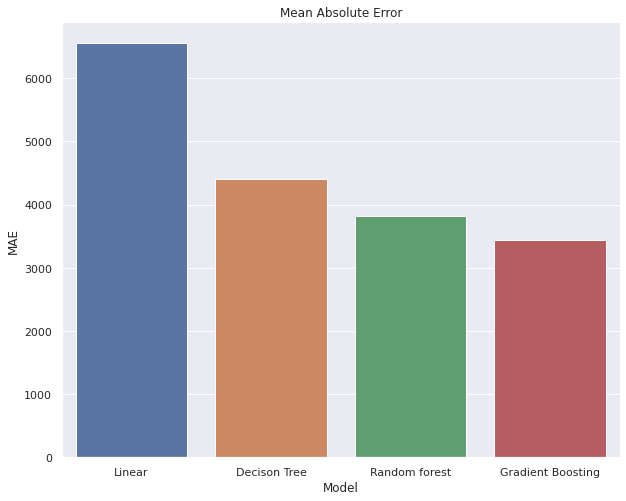

In [ ]:
compare = pd.DataFrame({'Model' : ['Linear','Decison Tree' , 'Random forest' , 'Gradient Boosting'] ,
                        'MAE' : [mae_linear,mae_tree,mae_rand,mae_cat]})
plt.figure(figsize = (10,8))
plt.title("Mean Absolute Error")
sns.barplot(x = 'Model' , y = 'MAE' , data = compare);

**b/Chỉ số đánh giá MSE:**

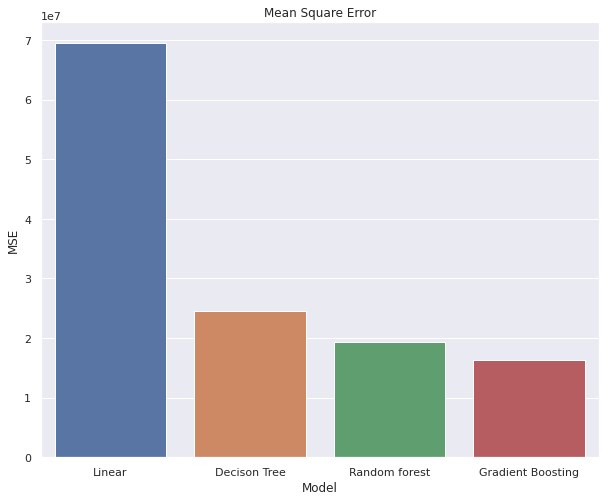

In [ ]:
compare1 = pd.DataFrame({'Model' : ['Linear','Decison Tree' , 'Random forest' , 'Gradient Boosting'] ,
                        'MSE' : [mse_linear,mse_tree,mse_rand,mse_cat]})
plt.figure(figsize = (10,8))
plt.title("Mean Square Error")
sns.barplot(x = 'Model' , y = 'MSE' , data = compare1);

**c/Chỉ số đánh giá RMSE:**

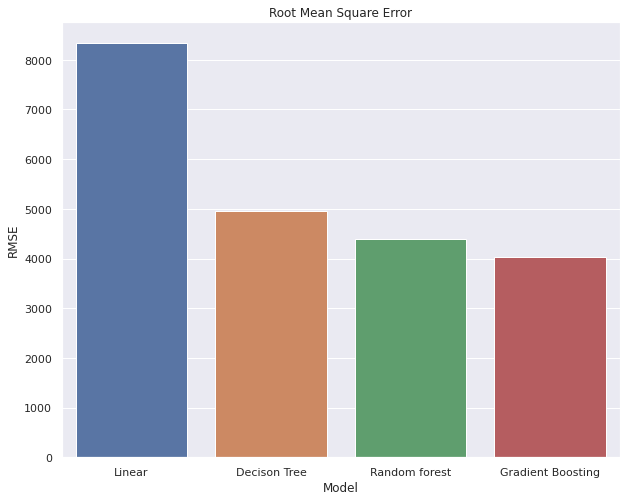

In [ ]:
compare2 = pd.DataFrame({'Model' : ['Linear','Decison Tree' , 'Random forest' , 'Gradient Boosting'] ,
                        'RMSE' : [rmse_linear,rmse_tree,rmse_rand,rmse_cat]})
plt.figure(figsize = (10,8))
plt.title("Root Mean Square Error")
sns.barplot(x = 'Model' , y = 'RMSE' , data = compare2);

**d/Chỉ số đánh giá R SQUARE:**

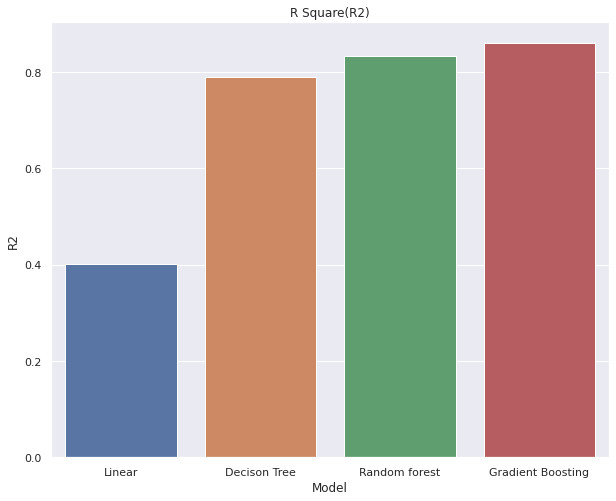

In [ ]:
compare3 = pd.DataFrame({'Model' : ['Linear','Decison Tree' , 'Random forest' , 'Gradient Boosting'] ,
                        'R2' : [r2_linear,r2_tree,r2_rand,r2_cat]})
plt.figure(figsize = (10,8))
plt.title("R Square(R2)")
sns.barplot(x = 'Model' , y = 'R2' , data = compare3);

**Bảng Thống Kê Chỉ Số Đánh Giá Giữa Các Mô Hình**

In [ ]:
compare4 = pd.DataFrame({'Model' : ['Linear','Decison Tree' , 'Random forest' , 'Gradient Boosting'] ,
                         'MAE' : [mae_linear,mae_tree,mae_rand,mae_cat],
                         'MSE' : [mse_linear,mse_tree,mse_rand,mse_cat],
                         'RMSE' : [rmse_linear,rmse_tree,rmse_rand,rmse_cat],
                         'R2' : [r2_linear,r2_tree,r2_rand,r2_cat]})
compare4.head()

,Model,MAE,MSE,RMSE,R2
0,Linear,6556.375726,6.946838e+07,8334.769388,0.402394
1,Decison Tree,4411.300000,2.450580e+07,4950.333783,0.789187
2,Random forest,3823.656306,1.934960e+07,4398.817703,0.833544
3,Gradient Boosting,3446.083742,1.626840e+07,4033.410823,0.860050


**Thông qua các biểu đồ , thống kê giữa các mô hình và hình ảnh trực quan hóa trên chỉ số thì có thể sắp xếp được thứ tự tin cậy giữa các thuật toán đối với tập dữ liệu này như sau:**


> Gradient Boosting > Random forest > Decison Tree > Linear




**VII/TRIỂN KHAI MÔ HÌNH**

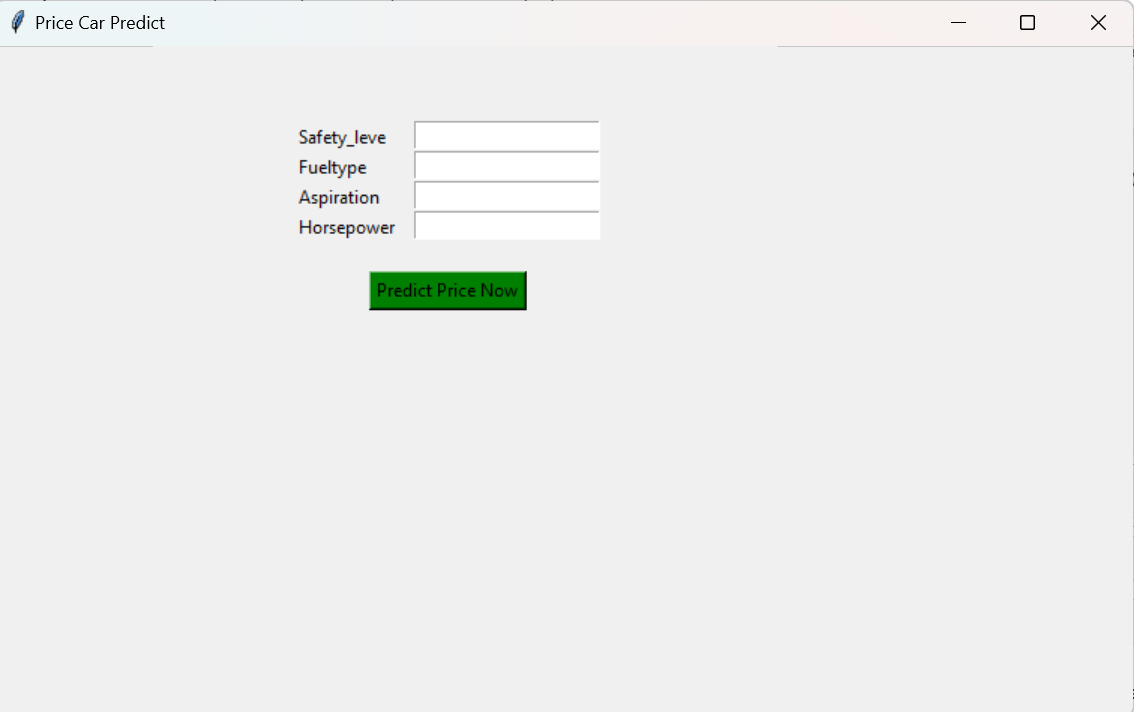

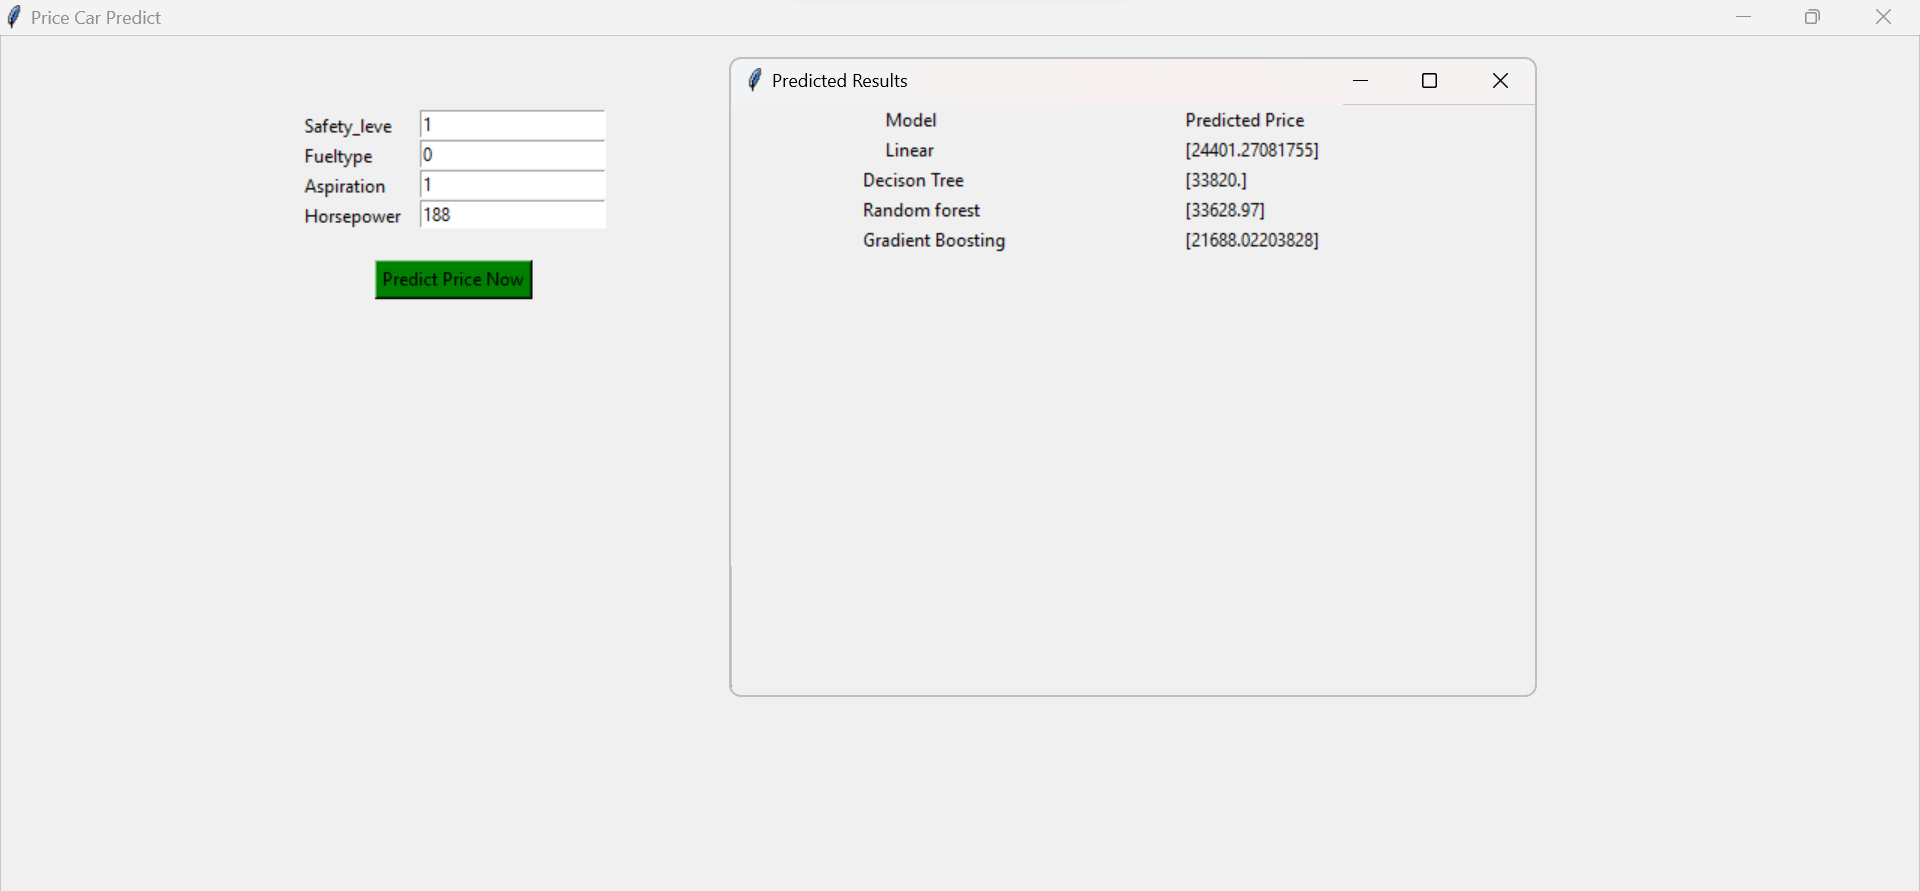